Sona Davis
# Tutorial 6: Photometric reverberation mapping with Astro Data Lab
 Introduction to Active Galactic Nuclei

## Task 1

**Goal:**

- Understand the photometric reverberation mapping method and its limitations. 
- Introduction to the tools for simulating AGN light curves and performing photoRM.

In [1]:
#Standard lib
import os
import warnings

# 3rd party libs
import numpy as np
np.int=int
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker 


In [3]:

%matplotlib inline

# Custom libs
import photRM
from pyzdcf import pyzdcf

In [122]:
help(photRM.lc_two_bands)

Help on function lc_two_bands in module photRM:

lc_two_bands(T, osc=True, A=0.14, noise=5e-05, z=0, method='Kelly1', lag='random', lum='random', wl=0.2, wc=0.8, plot_kernel=False)
    Generate two artificial light curves: 
        
        - one in the hypothetical X band covering solely the continuum emission;
        - one in the hypothetical Y band covering some emission line and its
          surrounding continuum;
    
    The X band light curve is generated using a stochastic model based on the 
    Damped random walk (DRW) proccess (see lc_conti() docs). The Y band light
    curve is modeled using a method described in Jankov et al. (2022) which is 
    based on the photoRM formalism by Chelouche & Daniel (2012).
    
    Parameters
    ----------
    T: int
        Total time span of the light curve. It is recommended to generate light
        curves to be at least 10 times longer than their characteristic 
        timescale (Kozłowski 2017). 
    osc: bool, default=True
     

In [124]:


# Generate 3 pairs of light curves in two different bands
x_band, y_band, line_response =\
    photRM.lc_two_bands(5000,osc=True,A=0.14,noise=0.00005,z=0.1,lag='random',lum=43,wl=0.25,wc=0.75,plot_kernel=False)

Properties of the simulated AGN object:
---------------------------------------
log(L) = 43.00
MBH = 3.14e+06 M_sun
tau_DRW = 17.31 days
sigma_DRW = 0.05 mag^2/day
Time-lag = 9.86 days


In [126]:
x_band, y_band, line_response =\
    photRM.lc_two_bands(5000,osc=True,A=0.14,noise=0.00005,z=0.1,lag='random',lum=44,wl=0.25,wc=0.75,plot_kernel=False)

Properties of the simulated AGN object:
---------------------------------------
log(L) = 44.00
MBH = 1.46e+07 M_sun
tau_DRW = 31.98 days
sigma_DRW = 0.03 mag^2/day
Time-lag = 33.65 days


In [128]:
x_band, y_band, line_response =\
    photRM.lc_two_bands(5000,osc=True,A=0.14,noise=0.00005,z=0.1,lag='random',lum=45,wl=0.25,wc=0.75,plot_kernel=False)

Properties of the simulated AGN object:
---------------------------------------
log(L) = 45.00
MBH = 6.76e+07 M_sun
tau_DRW = 59.10 days
sigma_DRW = 0.01 mag^2/day
Time-lag = 114.82 days


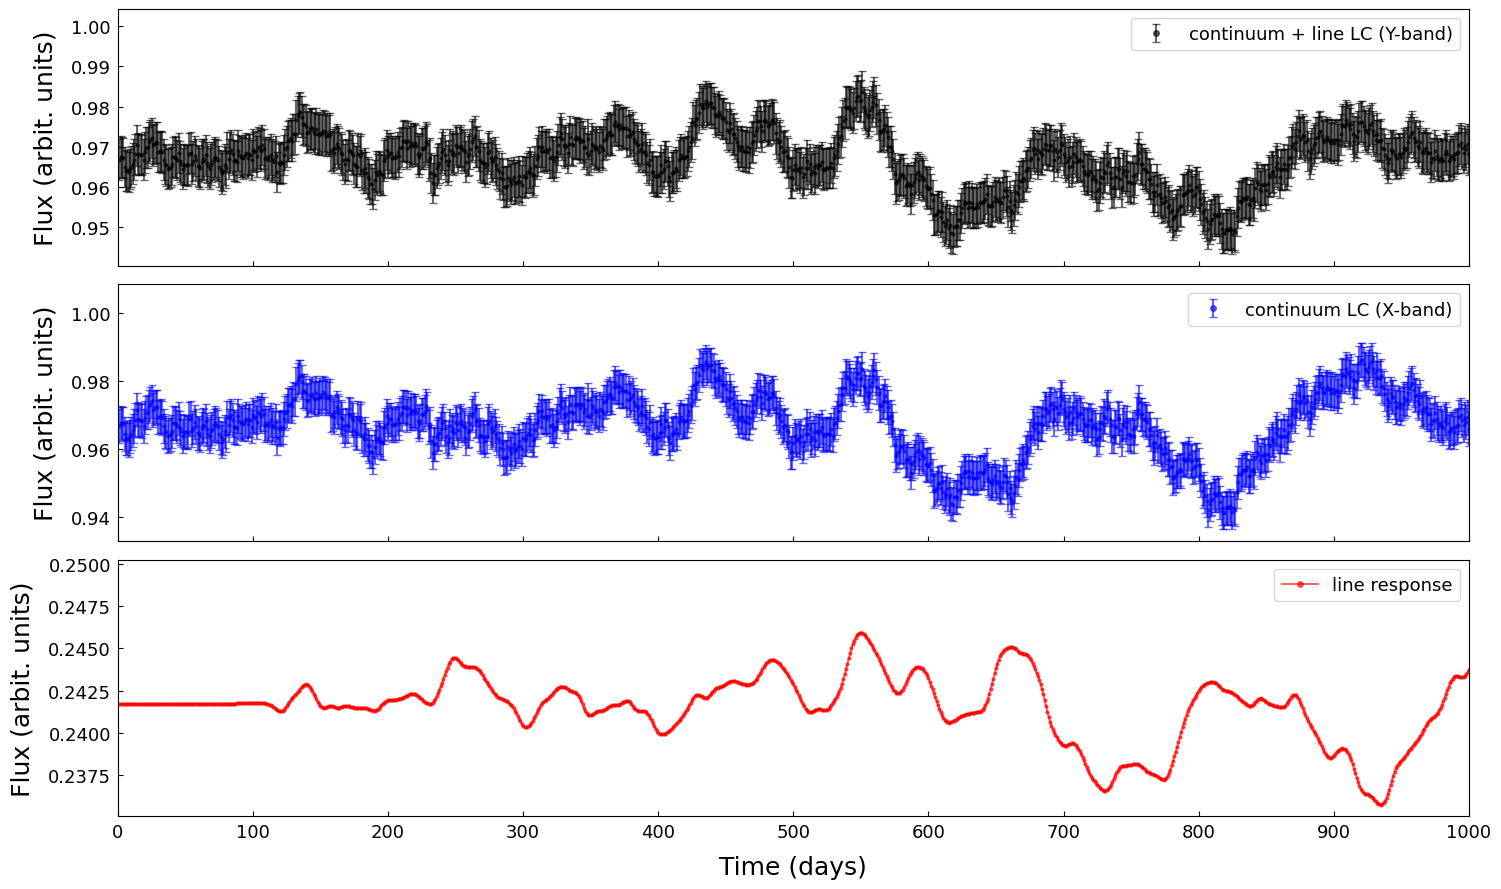

In [130]:
# Plot the light curves       
fig, (ax1,ax2,ax3) = plt.subplots(3,1,sharex=True,figsize=(15,9),tight_layout=True)
ax1.errorbar(y_band['t'],y_band['flux'],yerr=y_band['err'],fmt='ko',markersize=2,alpha=0.6,capsize=3,label='continuum + line LC (Y-band)')
ax2.errorbar(x_band['t'],x_band['flux'],yerr=x_band['err'],fmt='bo',markersize=2,alpha=0.6,capsize=3,label='continuum LC (X-band)')
ax3.plot(line_response['t'], line_response['flux'],'ro-', markersize=2,alpha=0.6, label='line response')

loc = plticker.MultipleLocator(100) # this locator puts ticks at regular intervals

for ax in [ax1,ax2,ax3]:
    ax.legend(fontsize=13,markerscale=2)
    ax.set_ylabel('Flux (arbit. units)',fontsize=18,labelpad=10)
    ax.tick_params(direction='in',pad=5,labelsize=13)
    ax.set_xlim(0,1000)
    ax.xaxis.set_major_locator(loc)

ax3.set_xlabel('Time (days)',fontsize=18,labelpad=10)
plt.show()

In [133]:
# Save the data
dir_path = './data/'

cut = 1000
np.savetxt(dir_path+'x_band',np.c_[x_band.t[:cut],x_band.flux[:cut],x_band.err[:cut]],fmt=['%.1f','%.7e','%.7e'])
np.savetxt(dir_path+'y_band',np.c_[y_band.t[:cut],y_band.flux[:cut],y_band.err[:cut]],fmt=['%.1f','%.7e','%.7e'])

### Task 1b)

In [136]:
# Set input parameters for pyZDCF
input_dir = './data/'     # Path to the input light curve data
output_dir = './results/' # Path to the directory for saving the results

# Light curve names
lc1 = 'x_band'
lc2 = 'y_band'

In [138]:
# Step 2: ACF calculation

# Parameters are passed to pyzdcf as a dictionary
params = dict(autocf            =  True,  # Autocorrelation (True) or cross-correlation (False)
              prefix            = 'acf',  # Output files prefix
              uniform_sampling  =  False, # Uniform sampling?
              omit_zero_lags    =  True,  # Omit zero lag points?
              minpts            =  0,     # Min. num. of points per bin (0 is a flag for default value of 11)
              num_MC            =  100,   # Num. of Monte Carlo simulations for error estimation
              lc1_name          =  lc1    # Name of the light curve file
             )

# Run pyzdcf
acf = pyzdcf(input_dir,output_dir,intr=False,parameters=params,sep=' ',sparse='auto')


pyZDCF begins:

pyZDCF PARAMETERS:

Autocorrelation?   True
Uniform sampling?  False
Omit zero lags?    True
Minimal # in bin:  11
# of Monte Carlo:  100
Monte Carlo seed:  123456

Binning with minimum of 11 points per bin and resolution of 0.001

990 bins actually used, 45.0 inter-dependent pairs discarded.


acf.dcf written...

pyZDCF ended.



In [142]:
# Step 3: CCF calculation
params = dict(autocf            =  False, # Autocorrelation (True) or cross-correlation (False)
              prefix            = 'ccf',  # Output files prefix
              uniform_sampling  =  False, # Uniform sampling?
              omit_zero_lags    =  True,  # Omit zero lag points?
              minpts            =  0,     # Min. num. of points per bin (0 is a flag for default value of 11)
              num_MC            =  100,   # Num. of Monte Carlo simulations for error estimation
              lc1_name          =  lc1,   # Name of the first light curve file
              lc2_name          =  lc2    # Name of the second light curve file
             )

ccf = pyzdcf(input_dir,output_dir,intr=False,parameters=params,sep=' ',sparse='auto')


pyZDCF begins:

pyZDCF PARAMETERS:

Autocorrelation?   False
Uniform sampling?  False
Omit zero lags?    True
Minimal # in bin:  11
# of Monte Carlo:  100
Monte Carlo seed:  123456

Binning with minimum of 11 points per bin and resolution of 0.001

992 bins actually used, 500032 inter-dependent pairs discarded.


ccf.dcf written...

pyZDCF ended.



In [148]:
acf.head()

,tau,-sig(tau),+sig(tau),dcf,-err(dcf),+err(dcf),#bin
0,1.0,0.0,0.0,0.751965,0.013927,0.013599,999.0
1,2.0,0.0,0.0,0.737688,0.014612,0.014275,998.0
2,3.0,0.0,0.0,0.724793,0.015222,0.014876,997.0
3,4.0,0.0,0.0,0.710399,0.015889,0.015535,996.0
4,5.0,0.0,0.0,0.696793,0.016508,0.016147,995.0


In [150]:
ccf.head()

,tau,-sig(tau),+sig(tau),dcf,-err(dcf),+err(dcf),#bin
0,-991.0,4.0,0.0,0.059199,0.387188,0.377242,9.0
1,-989.0,1.0,0.0,0.044218,0.339991,0.334370,11.0
2,-987.0,1.0,0.0,-0.054026,0.301501,0.306997,13.0
3,-985.0,1.0,0.0,-0.042351,0.278027,0.281621,15.0
4,-983.0,1.0,0.0,0.002395,0.260775,0.260600,17.0


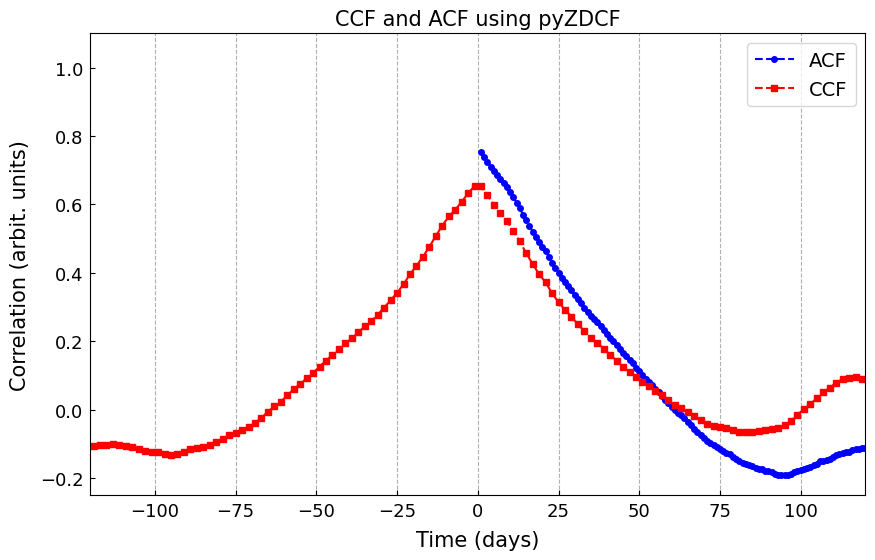

In [152]:
# Plot CCF and ACF
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(acf['tau'],acf['dcf'],'o--b',label='ACF',markersize=4)
ax.plot(ccf['tau'],ccf['dcf'],'s--r',label='CCF',markersize=4)

ax.set_xlim(-120,120)
ax.set_ylim(-0.25,1.1)
ax.set_xlabel("Time (days)",fontsize=15,labelpad=7)
ax.set_ylabel("Correlation (arbit. units)",fontsize=15,labelpad=7)
ax.legend(fontsize=14)
loc = plticker.MultipleLocator(25)
ax.xaxis.set_major_locator(loc)
ax.tick_params(direction='in', pad = 5,labelsize=13)
ax.set_title('CCF and ACF using pyZDCF',fontsize=15)
ax.grid(which='major',axis='x',linestyle='--')
plt.show()

### Calculate CCF

In [155]:
# Since pyZDCF does not provide the ACF on the negative tau axis, we need to add it:
acf = photRM.add_inverted_acf(acf)

print('ACF shape: ',acf.shape)
print('CCF shape: ',ccf.shape)

ACF shape:  (1980, 7)
CCF shape:  (992, 7)


In [157]:
# We do this by interpolating one of those functions to the time grid of the other.
acf = photRM.interp(ccf,acf) # first param is the function having the x-axis on which we want to interpolate the other function.
print('ACF shape: ',acf.shape)
print('CCF shape: ',ccf.shape)

ACF shape:  (992, 7)
CCF shape:  (992, 7)


In [159]:
# Subtracting CCF and ACF
final_ccf = photRM.delta_ccf(acf, ccf)

In [161]:
final_ccf.tail()

,tau,-sig(tau),+sig(tau),dcf,-err(dcf),+err(dcf),#bin
987,983.0,0,0,-0.009453,0.369338,0.367527,17
988,985.0,0,0,0.012243,0.395738,0.396968,15
989,987.0,0,0,0.031388,0.427378,0.432930,13
990,989.0,0,0,0.008982,0.475765,0.479130,11
991,991.0,1,4,0.093948,0.525681,0.523661,10


In [163]:
tau, peaks_x, peaks_y = photRM.peak_finder(final_ccf.dcf.values,final_ccf.tau.values,(0,100))

err_low = final_ccf.loc[final_ccf.tau == tau, '-sig(tau)'].values[0]
err_high = final_ccf.loc[final_ccf.tau == tau, '+sig(tau)'].values[0]

Peak candidates (x-axis vals):  [3. 7.]
Max. peak:  7.0


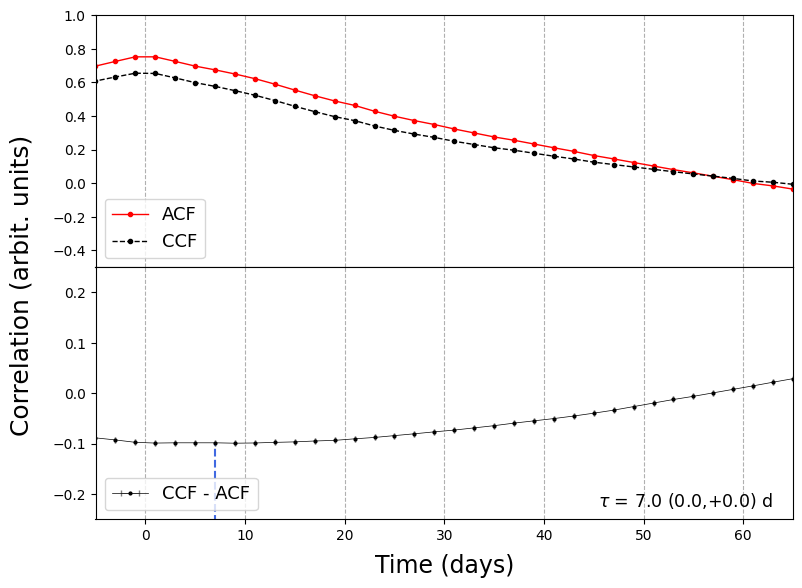

In [165]:
lims_x = (-5,65)
lims_y = (-0.5,1)
err = (err_low*(-1), err_high)

photRM.plot_ccf_acf(final_ccf,ccf,acf,locator=10,peak=True,tau=tau,err=err,lims_x=lims_x,lims_y=lims_y)

### Time-lag estimated: 7 days (real value = 9.86 days).

### 2nd lightcurve

In [169]:
x_band, y_band, line_response =\
    photRM.lc_two_bands(5000,osc=True,A=0.14,noise=0.00005,z=0.1,lag='random',lum=44,wl=0.25,wc=0.75,plot_kernel=False)

Properties of the simulated AGN object:
---------------------------------------
log(L) = 44.00
MBH = 1.46e+07 M_sun
tau_DRW = 31.98 days
sigma_DRW = 0.03 mag^2/day
Time-lag = 33.65 days


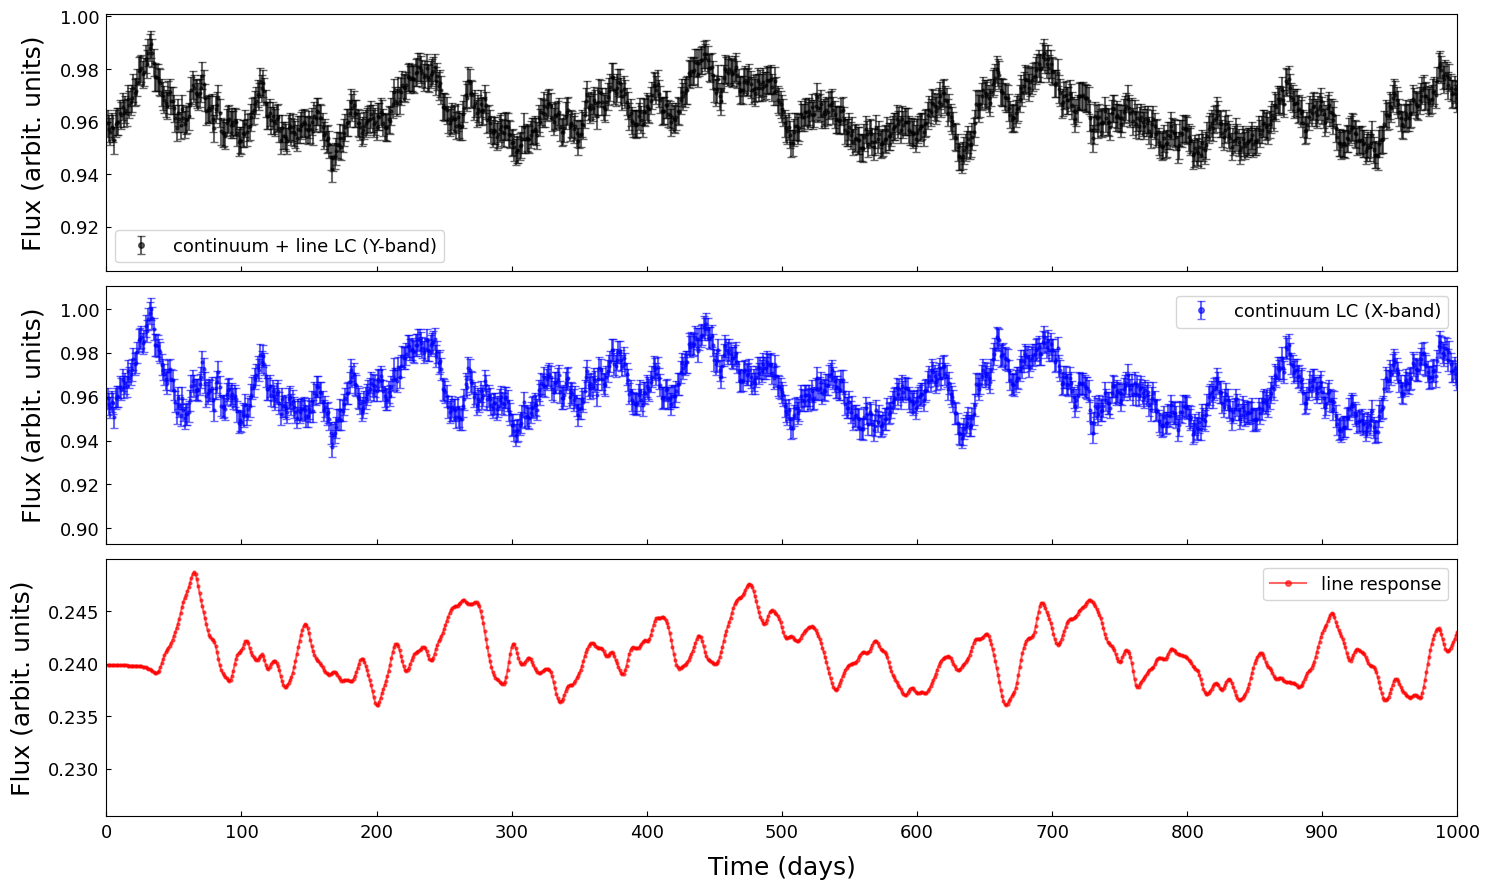

In [171]:
# Plot the light curves       
fig, (ax1,ax2,ax3) = plt.subplots(3,1,sharex=True,figsize=(15,9),tight_layout=True)
ax1.errorbar(y_band['t'],y_band['flux'],yerr=y_band['err'],fmt='ko',markersize=2,alpha=0.6,capsize=3,label='continuum + line LC (Y-band)')
ax2.errorbar(x_band['t'],x_band['flux'],yerr=x_band['err'],fmt='bo',markersize=2,alpha=0.6,capsize=3,label='continuum LC (X-band)')
ax3.plot(line_response['t'], line_response['flux'],'ro-', markersize=2,alpha=0.6, label='line response')

loc = plticker.MultipleLocator(100) # this locator puts ticks at regular intervals

for ax in [ax1,ax2,ax3]:
    ax.legend(fontsize=13,markerscale=2)
    ax.set_ylabel('Flux (arbit. units)',fontsize=18,labelpad=10)
    ax.tick_params(direction='in',pad=5,labelsize=13)
    ax.set_xlim(0,1000)
    ax.xaxis.set_major_locator(loc)

ax3.set_xlabel('Time (days)',fontsize=18,labelpad=10)
plt.show()

In [173]:
# Save the data
dir_path = './data2/'

cut = 1000
np.savetxt(dir_path+'x_band',np.c_[x_band.t[:cut],x_band.flux[:cut],x_band.err[:cut]],fmt=['%.1f','%.7e','%.7e'])
np.savetxt(dir_path+'y_band',np.c_[y_band.t[:cut],y_band.flux[:cut],y_band.err[:cut]],fmt=['%.1f','%.7e','%.7e'])

In [175]:
# Set input parameters for pyZDCF
input_dir = './data2/'     # Path to the input light curve data
output_dir = './results2/' # Path to the directory for saving the results

# Light curve names
lc1 = 'x_band'
lc2 = 'y_band'

In [177]:
params = dict(autocf            =  True,  # Autocorrelation (True) or cross-correlation (False)
              prefix            = 'acf',  # Output files prefix
              uniform_sampling  =  False, # Uniform sampling?
              omit_zero_lags    =  True,  # Omit zero lag points?
              minpts            =  0,     # Min. num. of points per bin (0 is a flag for default value of 11)
              num_MC            =  100,   # Num. of Monte Carlo simulations for error estimation
              lc1_name          =  lc1    # Name of the light curve file
             )

# Run pyzdcf
acf = pyzdcf(input_dir,output_dir,intr=False,parameters=params,sep=' ',sparse='auto')


pyZDCF begins:

pyZDCF PARAMETERS:

Autocorrelation?   True
Uniform sampling?  False
Omit zero lags?    True
Minimal # in bin:  11
# of Monte Carlo:  100
Monte Carlo seed:  123456

Binning with minimum of 11 points per bin and resolution of 0.001

990 bins actually used, 45.0 inter-dependent pairs discarded.


acf.dcf written...

pyZDCF ended.



In [179]:
# Step 3: CCF calculation
params = dict(autocf            =  False, # Autocorrelation (True) or cross-correlation (False)
              prefix            = 'ccf',  # Output files prefix
              uniform_sampling  =  False, # Uniform sampling?
              omit_zero_lags    =  True,  # Omit zero lag points?
              minpts            =  0,     # Min. num. of points per bin (0 is a flag for default value of 11)
              num_MC            =  100,   # Num. of Monte Carlo simulations for error estimation
              lc1_name          =  lc1,   # Name of the first light curve file
              lc2_name          =  lc2    # Name of the second light curve file
             )

ccf = pyzdcf(input_dir,output_dir,intr=False,parameters=params,sep=' ',sparse='auto')


pyZDCF begins:

pyZDCF PARAMETERS:

Autocorrelation?   False
Uniform sampling?  False
Omit zero lags?    True
Minimal # in bin:  11
# of Monte Carlo:  100
Monte Carlo seed:  123456

Binning with minimum of 11 points per bin and resolution of 0.001

992 bins actually used, 500032 inter-dependent pairs discarded.


ccf.dcf written...

pyZDCF ended.



In [181]:
acf.head()

,tau,-sig(tau),+sig(tau),dcf,-err(dcf),+err(dcf),#bin
0,1.0,0.0,0.0,0.791573,0.011974,0.011678,999.0
1,2.0,0.0,0.0,0.752552,0.013905,0.013578,998.0
2,3.0,0.0,0.0,0.714651,0.015687,0.015336,997.0
3,4.0,0.0,0.0,0.677006,0.017366,0.016997,996.0
4,5.0,0.0,0.0,0.639438,0.018950,0.018569,995.0


In [183]:
ccf.head()

,tau,-sig(tau),+sig(tau),dcf,-err(dcf),+err(dcf),#bin
0,-991.0,4.0,0.0,-0.001833,0.383417,0.383726,9.0
1,-989.0,1.0,0.0,-0.199556,0.312096,0.336371,11.0
2,-987.0,1.0,0.0,-0.326702,0.257503,0.286895,13.0
3,-985.0,1.0,0.0,-0.391484,0.223054,0.250762,15.0
4,-983.0,1.0,0.0,-0.338594,0.219706,0.241287,17.0


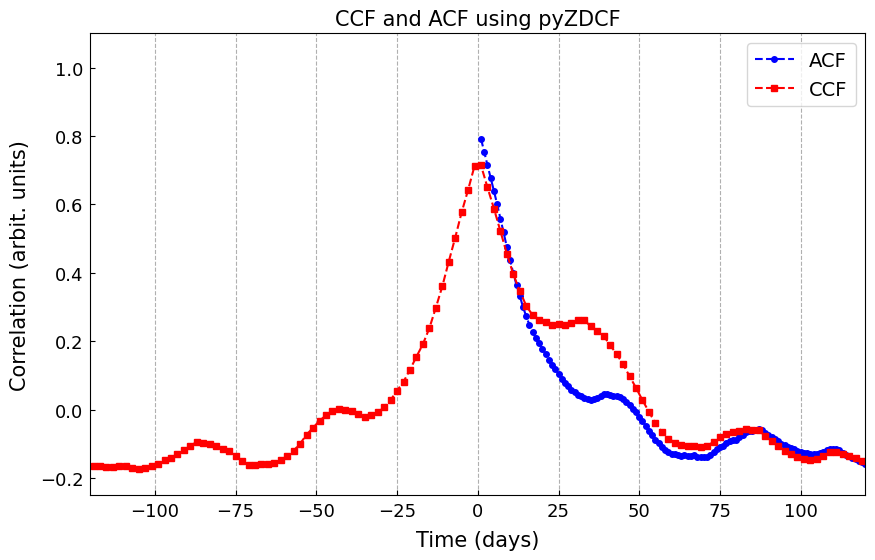

In [185]:
# Plot CCF and ACF
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(acf['tau'],acf['dcf'],'o--b',label='ACF',markersize=4)
ax.plot(ccf['tau'],ccf['dcf'],'s--r',label='CCF',markersize=4)

ax.set_xlim(-120,120)
ax.set_ylim(-0.25,1.1)
ax.set_xlabel("Time (days)",fontsize=15,labelpad=7)
ax.set_ylabel("Correlation (arbit. units)",fontsize=15,labelpad=7)
ax.legend(fontsize=14)
loc = plticker.MultipleLocator(25)
ax.xaxis.set_major_locator(loc)
ax.tick_params(direction='in', pad = 5,labelsize=13)
ax.set_title('CCF and ACF using pyZDCF',fontsize=15)
ax.grid(which='major',axis='x',linestyle='--')
plt.show()

In [187]:
# Since pyZDCF does not provide the ACF on the negative tau axis, we need to add it:
acf = photRM.add_inverted_acf(acf)

print('ACF shape: ',acf.shape)
print('CCF shape: ',ccf.shape)

ACF shape:  (1980, 7)
CCF shape:  (992, 7)


In [189]:
acf = photRM.interp(ccf,acf) # first param is the function having the x-axis on which we want to interpolate the other function.
print('ACF shape: ',acf.shape)
print('CCF shape: ',ccf.shape)

ACF shape:  (992, 7)
CCF shape:  (992, 7)


In [191]:
final_ccf = photRM.delta_ccf(acf, ccf)

In [193]:
final_ccf.tail()

,tau,-sig(tau),+sig(tau),dcf,-err(dcf),+err(dcf),#bin
987,983.0,0,0,0.042069,0.306306,0.329186,17
988,985.0,0,0,0.087219,0.310097,0.338773,15
989,987.0,0,0,0.104733,0.386366,0.411314,13
990,989.0,0,0,0.104013,0.428149,0.458628,11
991,991.0,1,4,-0.209534,0.517229,0.527558,10


In [195]:
tau, peaks_x, peaks_y = photRM.peak_finder(final_ccf.dcf.values,final_ccf.tau.values,(0,100))

err_low = final_ccf.loc[final_ccf.tau == tau, '-sig(tau)'].values[0]
err_high = final_ccf.loc[final_ccf.tau == tau, '+sig(tau)'].values[0]

Peak candidates (x-axis vals):  [33. 71.]
Max. peak:  33.0


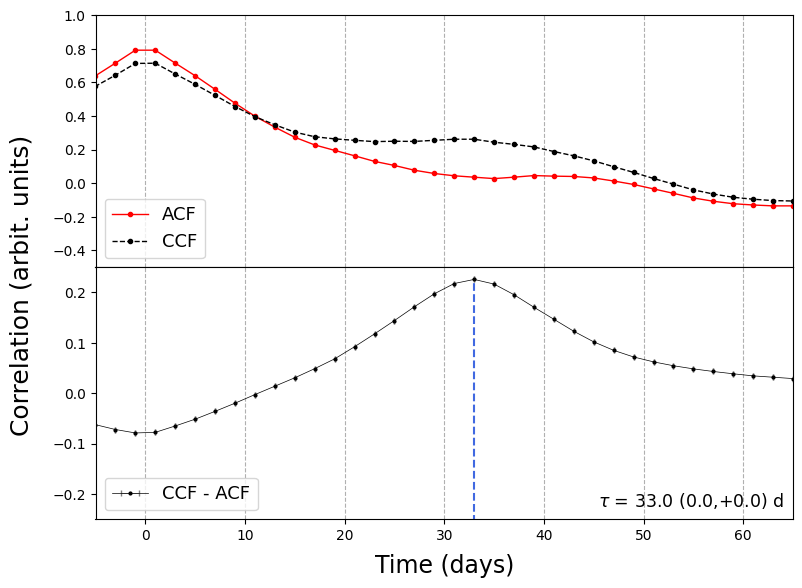

In [197]:
lims_x = (-5,65)
lims_y = (-0.5,1)
err = (err_low*(-1), err_high)

photRM.plot_ccf_acf(final_ccf,ccf,acf,locator=10,peak=True,tau=tau,err=err,lims_x=lims_x,lims_y=lims_y)

### Time-lag estimated: 33 days (real value = 33.4 days).


# Time lag of 3rd lightcurve

In [200]:
x_band, y_band, line_response =\
    photRM.lc_two_bands(5000,osc=True,A=0.14,noise=0.00005,z=0.1,lag='random',lum=45,wl=0.25,wc=0.75,plot_kernel=False)

Properties of the simulated AGN object:
---------------------------------------
log(L) = 45.00
MBH = 6.76e+07 M_sun
tau_DRW = 59.10 days
sigma_DRW = 0.01 mag^2/day
Time-lag = 114.82 days


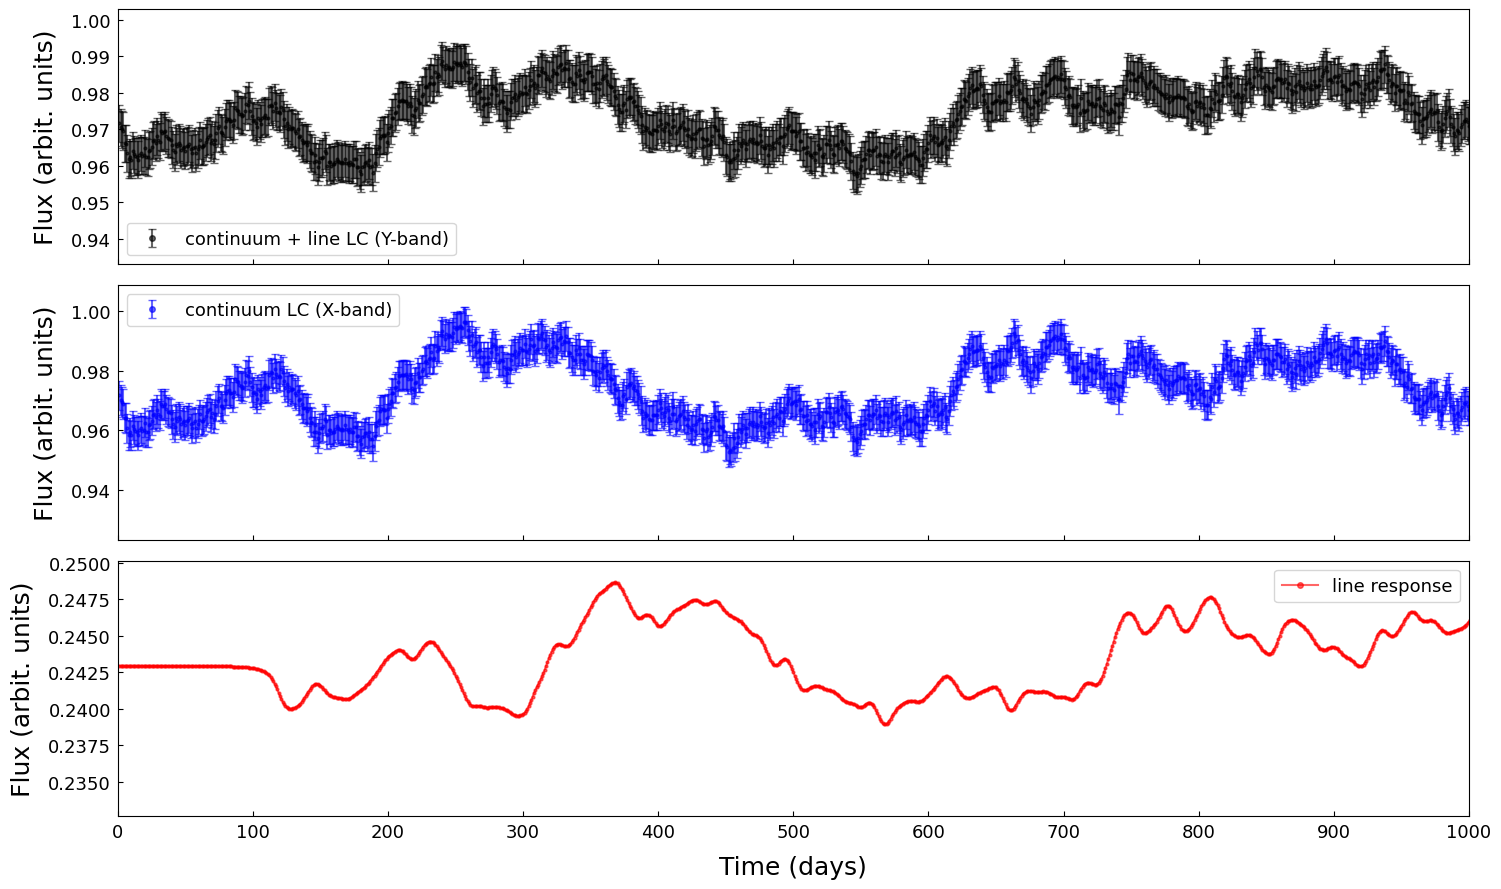

In [202]:
# Plot the light curves       
fig, (ax1,ax2,ax3) = plt.subplots(3,1,sharex=True,figsize=(15,9),tight_layout=True)
ax1.errorbar(y_band['t'],y_band['flux'],yerr=y_band['err'],fmt='ko',markersize=2,alpha=0.6,capsize=3,label='continuum + line LC (Y-band)')
ax2.errorbar(x_band['t'],x_band['flux'],yerr=x_band['err'],fmt='bo',markersize=2,alpha=0.6,capsize=3,label='continuum LC (X-band)')
ax3.plot(line_response['t'], line_response['flux'],'ro-', markersize=2,alpha=0.6, label='line response')

loc = plticker.MultipleLocator(100) # this locator puts ticks at regular intervals

for ax in [ax1,ax2,ax3]:
    ax.legend(fontsize=13,markerscale=2)
    ax.set_ylabel('Flux (arbit. units)',fontsize=18,labelpad=10)
    ax.tick_params(direction='in',pad=5,labelsize=13)
    ax.set_xlim(0,1000)
    ax.xaxis.set_major_locator(loc)

ax3.set_xlabel('Time (days)',fontsize=18,labelpad=10)
plt.show()

In [204]:
# Save the data
dir_path = './data3/'

cut = 1000
np.savetxt(dir_path+'x_band',np.c_[x_band.t[:cut],x_band.flux[:cut],x_band.err[:cut]],fmt=['%.1f','%.7e','%.7e'])
np.savetxt(dir_path+'y_band',np.c_[y_band.t[:cut],y_band.flux[:cut],y_band.err[:cut]],fmt=['%.1f','%.7e','%.7e'])

In [206]:
# Set input parameters for pyZDCF
input_dir = './data3/'     # Path to the input light curve data
output_dir = './results3/' # Path to the directory for saving the results

# Light curve names
lc1 = 'x_band'
lc2 = 'y_band'

In [208]:
# Step 2: ACF calculation

# Parameters are passed to pyzdcf as a dictionary
params = dict(autocf            =  True,  # Autocorrelation (True) or cross-correlation (False)
              prefix            = 'acf',  # Output files prefix
              uniform_sampling  =  False, # Uniform sampling?
              omit_zero_lags    =  True,  # Omit zero lag points?
              minpts            =  0,     # Min. num. of points per bin (0 is a flag for default value of 11)
              num_MC            =  100,   # Num. of Monte Carlo simulations for error estimation
              lc1_name          =  lc1    # Name of the light curve file
             )

# Run pyzdcf
acf = pyzdcf(input_dir,output_dir,intr=False,parameters=params,sep=' ',sparse='auto')


pyZDCF begins:

pyZDCF PARAMETERS:

Autocorrelation?   True
Uniform sampling?  False
Omit zero lags?    True
Minimal # in bin:  11
# of Monte Carlo:  100
Monte Carlo seed:  123456

Binning with minimum of 11 points per bin and resolution of 0.001

990 bins actually used, 45.0 inter-dependent pairs discarded.


acf.dcf written...

pyZDCF ended.



In [210]:
# Step 3: CCF calculation
params = dict(autocf            =  False, # Autocorrelation (True) or cross-correlation (False)
              prefix            = 'ccf',  # Output files prefix
              uniform_sampling  =  False, # Uniform sampling?
              omit_zero_lags    =  True,  # Omit zero lag points?
              minpts            =  0,     # Min. num. of points per bin (0 is a flag for default value of 11)
              num_MC            =  100,   # Num. of Monte Carlo simulations for error estimation
              lc1_name          =  lc1,   # Name of the first light curve file
              lc2_name          =  lc2    # Name of the second light curve file
             )

ccf = pyzdcf(input_dir,output_dir,intr=False,parameters=params,sep=' ',sparse='auto')


pyZDCF begins:

pyZDCF PARAMETERS:

Autocorrelation?   False
Uniform sampling?  False
Omit zero lags?    True
Minimal # in bin:  11
# of Monte Carlo:  100
Monte Carlo seed:  123456

Binning with minimum of 11 points per bin and resolution of 0.001

992 bins actually used, 500032 inter-dependent pairs discarded.


ccf.dcf written...

pyZDCF ended.



In [212]:
acf.head()

,tau,-sig(tau),+sig(tau),dcf,-err(dcf),+err(dcf),#bin
0,1.0,0.0,0.0,0.800096,0.011541,0.011252,999.0
1,2.0,0.0,0.0,0.789901,0.012065,0.011767,998.0
2,3.0,0.0,0.0,0.780079,0.012564,0.012257,997.0
3,4.0,0.0,0.0,0.768483,0.013145,0.012828,996.0
4,5.0,0.0,0.0,0.758278,0.013650,0.013325,995.0


In [214]:
ccf.head()

,tau,-sig(tau),+sig(tau),dcf,-err(dcf),+err(dcf),#bin
0,-991.0,4.0,0.0,-0.115876,0.368749,0.387992,9.0
1,-989.0,1.0,0.0,-0.141346,0.322219,0.339818,11.0
2,-987.0,1.0,0.0,-0.134552,0.292832,0.306287,13.0
3,-985.0,1.0,0.0,-0.016076,0.279576,0.280943,15.0
4,-983.0,1.0,0.0,0.173981,0.258837,0.246590,17.0


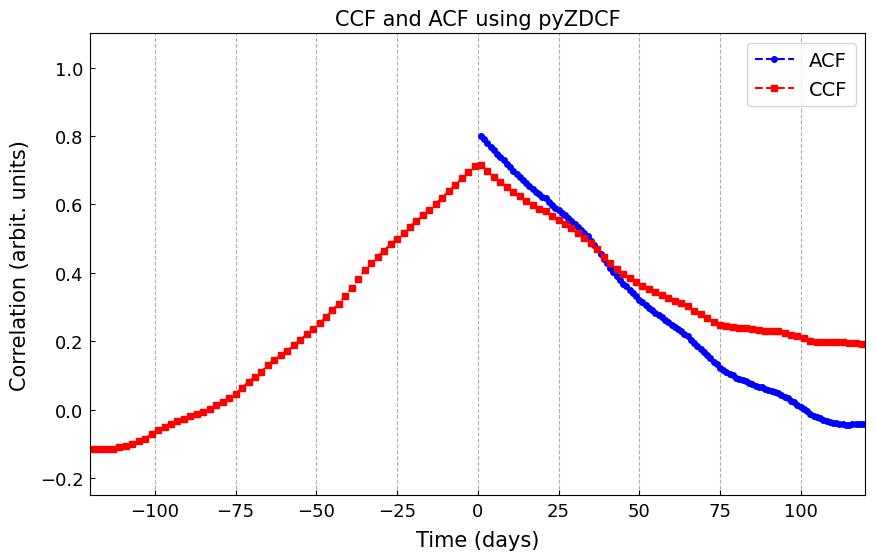

In [216]:
# Plot CCF and ACF
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(acf['tau'],acf['dcf'],'o--b',label='ACF',markersize=4)
ax.plot(ccf['tau'],ccf['dcf'],'s--r',label='CCF',markersize=4)

ax.set_xlim(-120,120)
ax.set_ylim(-0.25,1.1)
ax.set_xlabel("Time (days)",fontsize=15,labelpad=7)
ax.set_ylabel("Correlation (arbit. units)",fontsize=15,labelpad=7)
ax.legend(fontsize=14)
loc = plticker.MultipleLocator(25)
ax.xaxis.set_major_locator(loc)
ax.tick_params(direction='in', pad = 5,labelsize=13)
ax.set_title('CCF and ACF using pyZDCF',fontsize=15)
ax.grid(which='major',axis='x',linestyle='--')
plt.show()

In [218]:
# Since pyZDCF does not provide the ACF on the negative tau axis, we need to add it:
acf = photRM.add_inverted_acf(acf)

print('ACF shape: ',acf.shape)
print('CCF shape: ',ccf.shape)

ACF shape:  (1980, 7)
CCF shape:  (992, 7)


In [220]:
# We do this by interpolating one of those functions to the time grid of the other.
acf = photRM.interp(ccf,acf) # first param is the function having the x-axis on which we want to interpolate the other function.
print('ACF shape: ',acf.shape)
print('CCF shape: ',ccf.shape)

ACF shape:  (992, 7)
CCF shape:  (992, 7)


In [222]:
# Subtracting CCF and ACF
final_ccf = photRM.delta_ccf(acf, ccf)

In [224]:
final_ccf.tail()

,tau,-sig(tau),+sig(tau),dcf,-err(dcf),+err(dcf),#bin
987,983.0,0,0,-0.077419,0.356468,0.340868,17
988,985.0,0,0,-0.032595,0.397399,0.394072,15
989,987.0,0,0,0.025366,0.419784,0.431455,13
990,989.0,0,0,0.053498,0.436758,0.464813,11
991,991.0,1,4,-0.037288,0.499026,0.522590,10


In [236]:
min_tau = final_ccf.tau.min()
max_tau = final_ccf.tau.max()

tau, peaks_x, peaks_y = photRM.peak_finder(final_ccf.dcf.values,final_ccf.tau.values,(min_tau, max_tau))

err_low = final_ccf.loc[final_ccf.tau == tau, '-sig(tau)'].values[0]
err_high = final_ccf.loc[final_ccf.tau == tau, '+sig(tau)'].values[0]

Peak candidates (x-axis vals):  [113. 233. 325. 359. 497. 501. 521. 549. 653. 673. 677. 683. 701. 709.
 735. 743. 803. 869. 873. 895. 901. 919. 925. 929. 963. 975.]
Max. peak:  113.0


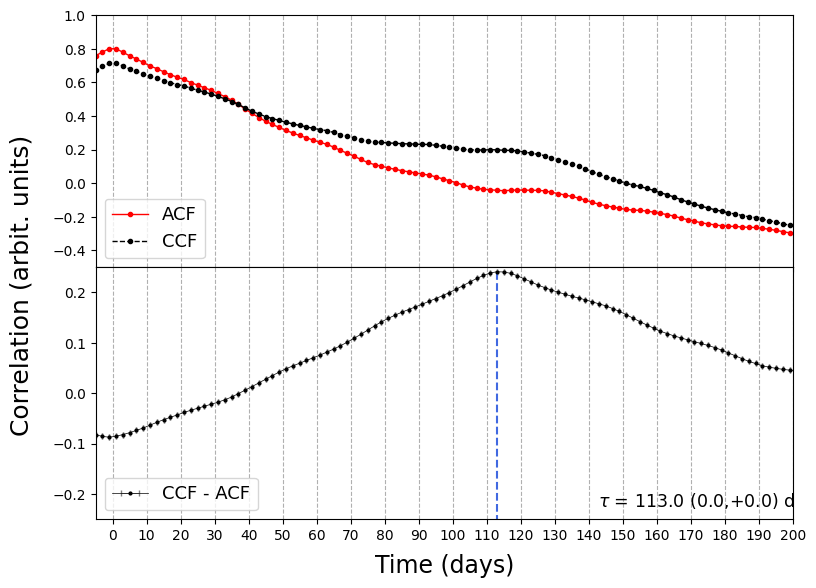

In [260]:
lims_x = (-5,200)
lims_y = (-0.5,1)
err = (err_low*(-1), err_high)

photRM.plot_ccf_acf(final_ccf,ccf,acf,locator=10,peak=True,tau=tau,err=err,lims_x=lims_x,lims_y=lims_y)

### Time-lag estimated: 113 days (real value = 114.82 days).

##  Task 2

Goal: Apply photometric reverberation mapping to real-world data.

Download photometric light curves of NGC 4395 from Edri et al. (2012). Choose one filter which covers the continuum emission only and the other one that covers the H
emission line and the underlying continuum. Using the utility functions provided, process the data so that time is expressed in hours and line intensity and its error are expressed as normalized flux. Plot the light curves. You will see that they are divided into segments because we have a pause in observations during the daylight. Choose the first segment and estimate the time lag using this data. Compare your results to Edri et al. (2012) and discuss the pros and cons of photometric reverberation mapping compared to spectroscopic reverberation mapping.

In [8]:
import pandas as pd
# Read the light curves using pd.read_csv()

r = pd.read_csv("/home/user/Documents/AGN/tutorial 6/lc_r.txt", sep='\s+')
g = pd.read_csv("/home/user/Documents/AGN/tutorial 6/lc_g.txt", sep='\s+')
i = pd.read_csv("/home/user/Documents/AGN/tutorial 6/lc_i.txt", sep='\s+')
r.head()

,MJD,mag,mag_err
0,2.455616e+06,16.272,0.027
1,2.455616e+06,16.270,0.026
2,2.455616e+06,16.263,0.022
3,2.455616e+06,16.260,0.021
4,2.455616e+06,16.251,0.021


In [12]:


# Light curve processing utility function

from lc_proc import lc_proc
# help(lc_proc)

lcs = [g,r,i]
filters = ['g', 'r', 'i'] # see lc_proc docs for accepted values for filters
new_lcs = lc_proc(lcs, filters)
new_lcs[0].head()



,MJD,mag,mag_err,time_hours,flux,flux_err,norm_flux,norm_flux_err
0,2.455616e+06,17.289,0.019,0.00000,1344.002263,25.536043,0.331021,0.089621
1,2.455616e+06,17.264,0.022,0.23232,1375.308097,30.256778,0.440891,0.106189
2,2.455616e+06,17.274,0.015,0.46464,1362.699197,20.440488,0.396639,0.071738
3,2.455616e+06,17.261,0.019,0.69720,1379.113469,26.203156,0.454246,0.091962
4,2.455616e+06,17.258,0.015,0.92952,1382.929370,20.743941,0.467639,0.072803


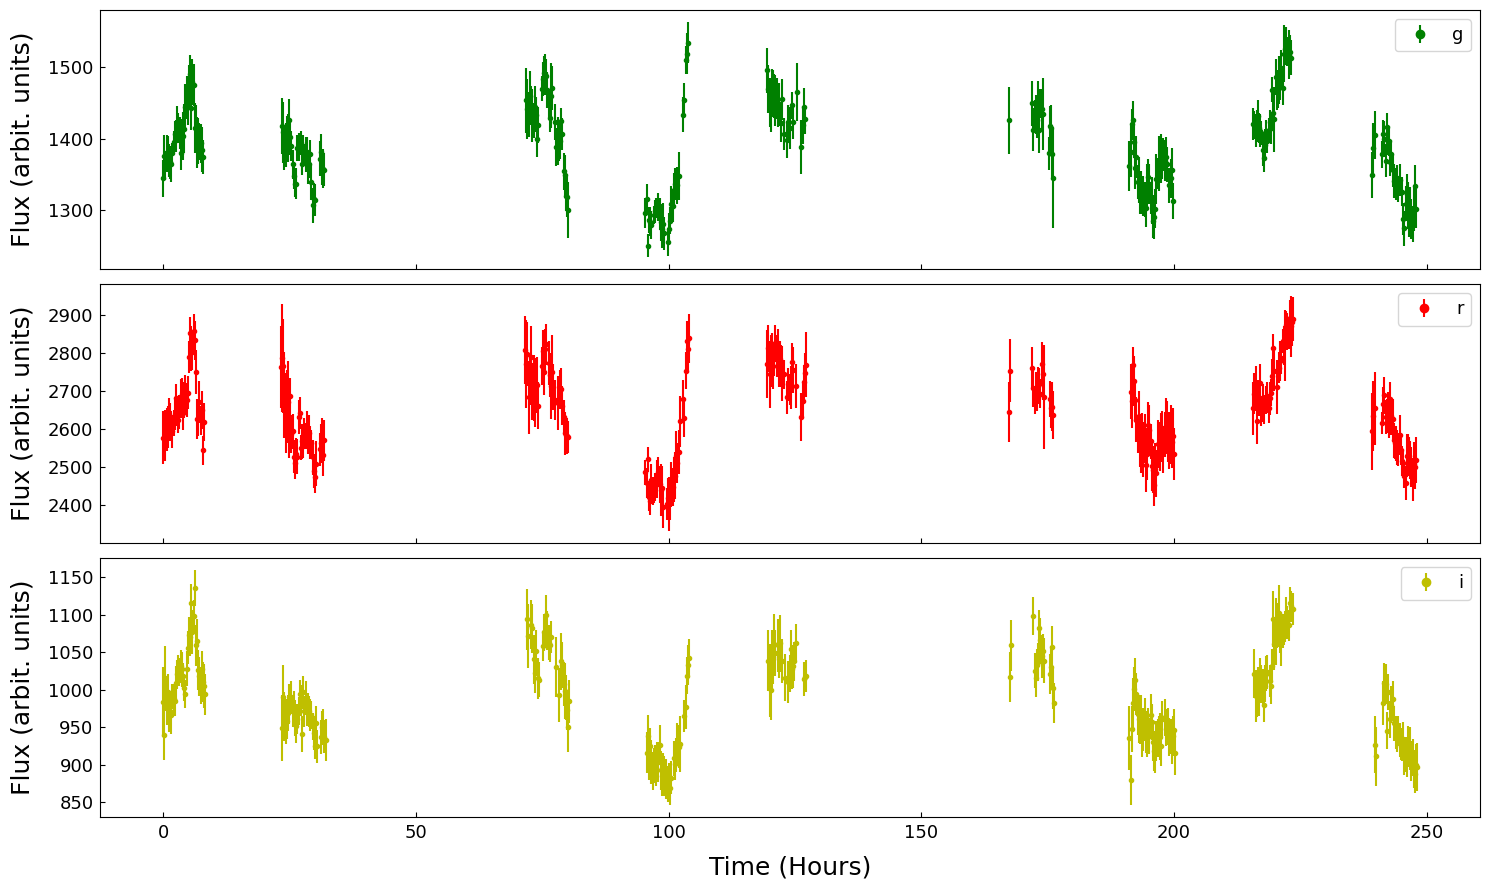

In [16]:
import matplotlib.pyplot as plt

# Plotting the first 1000 days of the light curves    
fig, ax = plt.subplots(3,1,sharex=True,figsize=(15,9),tight_layout=True)

ax[0].errorbar(new_lcs[0]['time_hours'], new_lcs[0]['flux'],yerr=new_lcs[0]['flux_err'],fmt='go', markersize=3, label='g')
ax[1].errorbar(new_lcs[1]['time_hours'], new_lcs[1]['flux'],yerr=new_lcs[1]['flux_err'], fmt='ro', markersize=3, label='r')
ax[2].errorbar(new_lcs[2]['time_hours'], new_lcs[2]['flux'],yerr=new_lcs[2]['flux_err'], fmt='yo', markersize=3, label='i')

for j in range(3):
    ax[j].legend(fontsize=13,markerscale=2)
    ax[j].set_ylabel('Flux (arbit. units)',fontsize=18,labelpad=10)
    ax[j].tick_params(direction='in',pad=5,labelsize=13)

ax[2].set_xlabel('Time (Hours)',fontsize=18,labelpad=10)
plt.show()



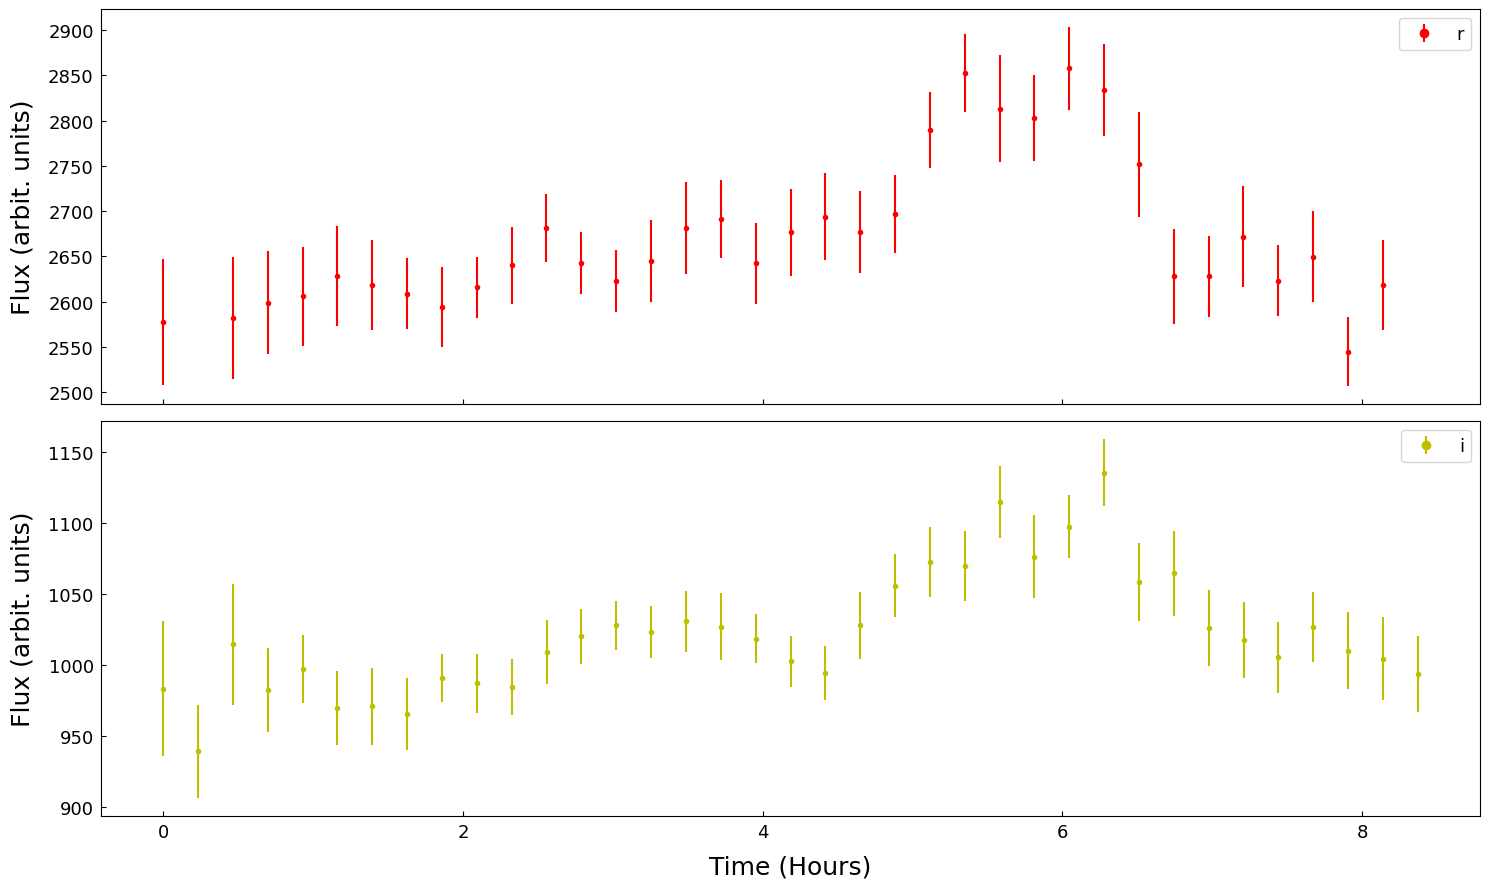

In [20]:
import numpy as np
# Choosing the first segment of the data

lc_r = new_lcs[1]
lc_i = new_lcs[2]
lc_r_seg1 = lc_r[lc_r['time_hours']<9]
lc_i_seg1 = lc_i[lc_i['time_hours']<9]

# Save the data

dir_path ='./data/'

np.savetxt(dir_path+'lc_i.txt', np.c_[lc_i_seg1['time_hours'],lc_i_seg1['norm_flux'],lc_i_seg1['norm_flux_err']],fmt=['%.1f','%.7e','%.7e'])
np.savetxt(dir_path+'lc_r.txt', np.c_[lc_r_seg1['time_hours'],lc_r_seg1['norm_flux'],lc_r_seg1['norm_flux_err']],fmt=['%.1f','%.7e','%.7e'])

fig, ax = plt.subplots(2,1,sharex=True,figsize=(15,9),tight_layout=True)

ax[0].errorbar(lc_r_seg1['time_hours'], lc_r_seg1['flux'],yerr=lc_r_seg1['flux_err'], fmt='ro', markersize=3, label='r')
ax[1].errorbar(lc_i_seg1['time_hours'], lc_i_seg1['flux'],yerr=lc_i_seg1['flux_err'], fmt='yo', markersize=3, label='i')

for j in range(2):
    ax[j].legend(fontsize=13,markerscale=2)
    ax[j].set_ylabel('Flux (arbit. units)',fontsize=18,labelpad=10)
    ax[j].tick_params(direction='in',pad=5,labelsize=13)
    
ax[1].set_xlabel('Time (Hours)',fontsize=18,labelpad=10)
plt.show()


In [29]:
input_dir = './data/'     # Path to the input light curve data
output_dir = './results/' # Path to the directory for saving the results

lcr = 'lc_r.txt' # r-band -- Halpha + continuum -- y-band
lci = 'lc_i.txt' # i-band -- pure continuum -- x-band

# ACF calculation

params = dict(autocf            =  True,  # Autocorrelation (True) or cross-correlation (False)
              prefix            = 'acf',  # Output files prefix
              uniform_sampling  =  False, # Uniform sampling?
              omit_zero_lags    =  True,  # Omit zero lag points?
              minpts            =  0,     # Min. num. of points per bin (0 is a flag for default value of 11)
              num_MC            =  100,   # Num. of Monte Carlo simulations for error estimation
              lc1_name          =  lci   # Name of the light curve file
             )

acf = pyzdcf(input_dir,output_dir,intr=False,parameters=params,sep=' ',sparse='auto')

# CCF calculation

params = dict(autocf            =  False, # Autocorrelation (True) or cross-correlation (False)
              prefix            = 'ccf',  # Output files prefix
              uniform_sampling  =  False, # Uniform sampling?
              omit_zero_lags    =  True,  # Omit zero lag points?
              minpts            =  0,     # Min. num. of points per bin (0 is a flag for default value of 11)
              num_MC            =  100,   # Num. of Monte Carlo simulations for error estimation
              lc1_name          =  lci,   # Name of the first light curve file
              lc2_name          =  lcr    # Name of the second light curve file
             )

ccf = pyzdcf(input_dir,output_dir,intr=False,parameters=params,sep=' ',sparse='auto')

# Interpolating

acf = photRM.interp(ccf,acf)
final_ccf = photRM.delta_ccf(acf, ccf)

# # Estimating time lag

tau, peaks_x, peaks_y = photRM.peak_finder(final_ccf.dcf.values,final_ccf.tau.values,(0,100))

err_low = final_ccf.loc[final_ccf.tau == tau, '-sig(tau)'].values[0]
err_high = final_ccf.loc[final_ccf.tau == tau, '+sig(tau)'].values[0]


pyZDCF begins:

pyZDCF PARAMETERS:

Autocorrelation?   True
Uniform sampling?  False
Omit zero lags?    True
Minimal # in bin:  11
# of Monte Carlo:  100
Monte Carlo seed:  123456

Binning with minimum of 11 points per bin and resolution of 0.001

35 bins actually used, 45.0 inter-dependent pairs discarded.


acf.dcf written...

pyZDCF ended.


pyZDCF begins:

pyZDCF PARAMETERS:

Autocorrelation?   False
Uniform sampling?  False
Omit zero lags?    True
Minimal # in bin:  11
# of Monte Carlo:  100
Monte Carlo seed:  123456

Binning with minimum of 11 points per bin and resolution of 0.001

64 bins actually used, 164 inter-dependent pairs discarded.


ccf.dcf written...

pyZDCF ended.

Peak candidates (x-axis vals):  [0.30000001 0.5        1.20000005 1.76315788 2.0888888  2.47058826
 2.7833333  3.5        3.88461546 4.74545453]
Max. peak:  4.745454528115013


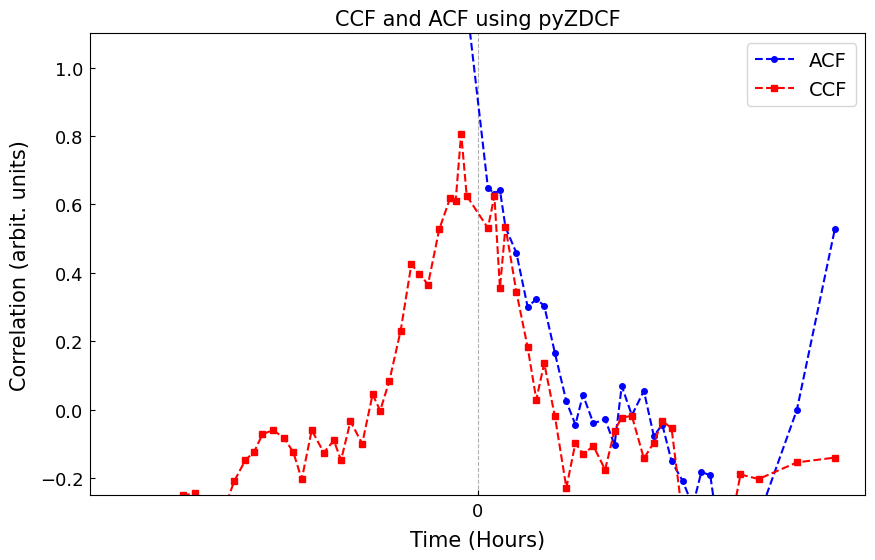

In [35]:
# Plot CCF and ACF
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.plot(acf['tau'],acf['dcf'],'o--b',label='ACF',markersize=4)
ax.plot(ccf['tau'],ccf['dcf'],'s--r',label='CCF',markersize=4)

ax.set_xlim(-7,7)
ax.set_ylim(-0.25,1.1)
ax.set_xlabel("Time (Hours)",fontsize=15,labelpad=7)
ax.set_ylabel("Correlation (arbit. units)",fontsize=15,labelpad=7)
ax.legend(fontsize=14)
loc = plticker.MultipleLocator(25)
ax.xaxis.set_major_locator(loc)
ax.tick_params(direction='in', pad = 5,labelsize=13)
ax.set_title('CCF and ACF using pyZDCF',fontsize=15)
ax.grid(which='major',axis='x',linestyle='--')
plt.show()

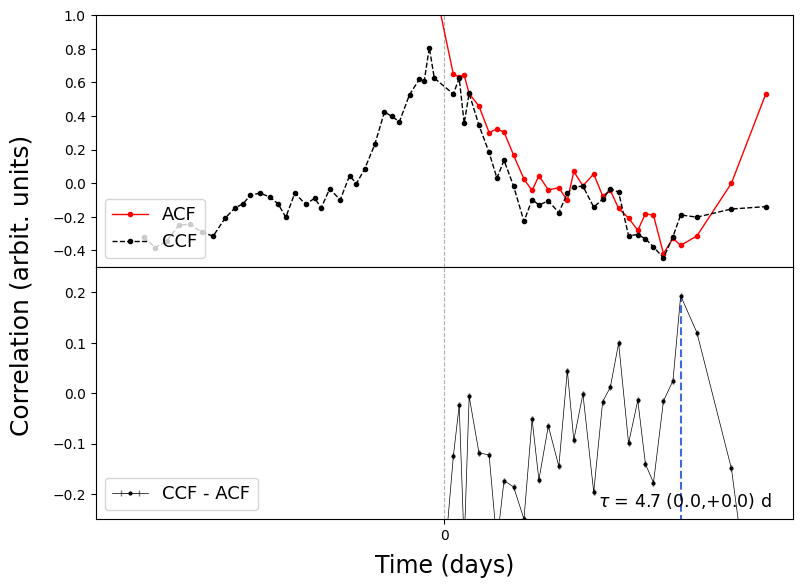

In [37]:


lims_x = (-7,7)
lims_y = (-0.5,1)
err = (err_low*(-1), err_high)

photRM.plot_ccf_acf(final_ccf,ccf,acf,locator=10,peak=True,tau=tau,err=err,lims_x=lims_x,lims_y=lims_y)
# note that the time here is in hours not days





   - According to Edri et al.(2012) the time lag for Hα is 3.6 +/- 0.8 hours and here we have estimated 4.7 hours.

   -This is quite a close match and displays the reliability of the photometric reverberation mapping technique.





Pros:

    Photometric observations are generally simpler and easier than spectroscopic ones. It can be performed with smaller telescopes and less sophisticated equipment.
    Photometric data can be obtained more frequently, providing higher temporal resolution which is useful for monitoring rapid variability in AGNs.
    Photometric surveys often have a wider field of view, allowing for simultaneous monitoring of multiple AGNs.

Cons:

    In PhotoRM, the light from emission lines is blended with the continuum emission and requires careful separation of the continuum and line contributions.
    Spectroscopic RM provides more precise measurements of the emission line profiles and their variations. PhotoRM can suffer from higher uncertainties in time lag estimation.
    PhotoRM does not provide detailed spectral information, such as line widths and shapes, which help to better understand the kinematics and structure of the BLR.

